# Rechnen mit Wahrscheinlichkeiten 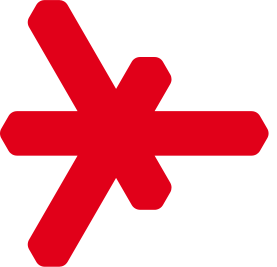
In diesem Notebook möchten wir uns mit einem Problem befassen, das häufig in der Praxis auftritt wenn wir mit Wahrscheinlichkeiten rechnen: Die Werte werden sehr sehr klein, so dass Sie mit herkömmlicher Floating-Point-Arithmetik zu null gerundet werden.

## 1. Vorbereitung

Wir bleiben bei dem Fabrikbeispiel aus dem letzten Notebook. Kopieren Sie zunächst Ihre Implementierung von *binomial_recursive()* aus dem letzten Notebook in die folgende Zelle und führen Sie sie aus (der Plot sollte eine korrekte Binomialverteilung zeigen).

<IPython.core.display.Javascript object>


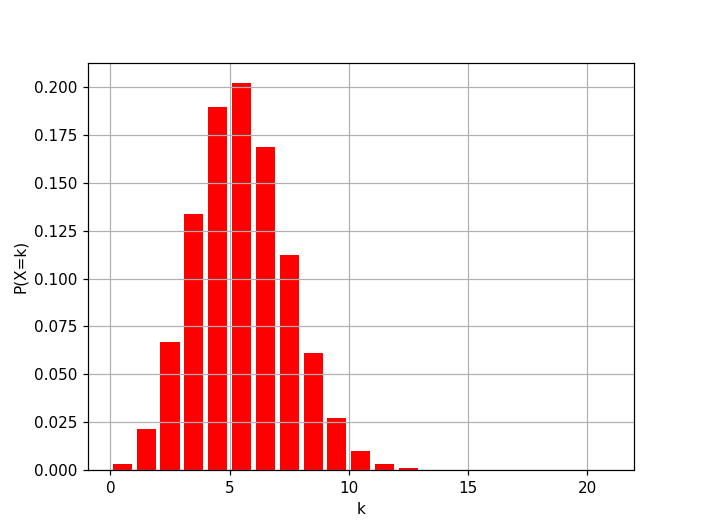

In [2]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import sys

# recursive - less performant
def binomial_recursive(n, p, start=-1, k=0):
    if(start == -1):
        sys.setrecursionlimit(max(n + 100,1500))
        start = (1-p)**n # calc P(X=0)
    yield start # always return the start (base) value
    if(k < n): # recurse if k <= n
        yield from binomial_recursive(n, p, 
            start * (p/(1-p)) * ((n-k)/(k+1)), k+1)

# iterative - more performant
def binomial_iterative(n, p):
    P = np.ones(n+1)
    P[0] = (1-p)**n
    for k in range(n):
        P[k+1] = P[k] * (p/(1-p)) * ((n-k)/(k+1))
    return P

def barplot(P):
    ind = np.arange(0,len(P))
    fig, ax = plt.subplots()
    rects1 = ax.bar(ind+0.5, P, 0.8, color='red')
    ax.set_ylabel('P(X=k)')
    ax.set_xlabel('k')
    plt.grid(True)
    plt.show()
    
# Einfacher Test
barplot(binomial_iterative(20, 0.25))

## 2. Kleine kleine Werte ....

Die Ausschussrate sei nun $p=10$\%. Wir berechnen $P(X=1000)$, d.h. die Wahrscheinlichkeit dass 1000 Teile defekt sind.

Wir erhalten den Wert $P(X=1000)=0$. Das ist offensichtlich falsch, denn eigentlich sollte der Wert ungefähr $1,33$\% betragen.

Können Sie das Problem im Detail erklären? Studieren Sie hierzu das Array $P$. 

In [3]:

P = binomial_iterative(10000, 0.1)

# Klappt nicht :-(
print(P[1000])

print((1-0.1)**7072)
print((1-0.1)**7073)

0.0
5e-324
0.0


> Das Array P enthält nur Nullen, da bereits der Rekursionsbeginn 0 ergibt. Alle weiteren Werte werden durch Multiplikation mit diesem errechnet und sind daher auch 0.  
Der Code errechnet $P(X=0) = (1-0.1)^n$ als 0, da die Potenz des $(1-0.1)$ zu hoch ist, und etwa ab einem Exponenten von 7073 zur Rundung auf 0 führt (herausgefunden durch "binäres Ausprobieren"), da die Präzision des float-Datentyps nicht genügt.

## 3. Rechnen mit kleinen kleinen Werten

Eine typische Strategie, um auch mit kleinen Zahlen erfolgreich zu rechnen, ist die Verwendung des Logarithmus. Implementieren Sie eine Methode **binomial_log()**, die zunächst *nicht* die Einzelwahrscheinlichkeiten $P$
$$
  P := P(X=0), P(X=1), P(X=2), ...
$$
sondern die zugehörigen Logarithmen $logP$ berechnet:
$$
 logP := log \big( P(X=0) \big) , log \big( P(X=1) \big) , log \big( P(X=2) \big) , ...
$$
Verwenden Sie hierzu die rekursive Formel und passen Sie diese auf Logarithmen an.
Berechnen Sie zuletzt das gesuchte Array P, indem Sie auf die Werte in logP die Exponentialfunktion anwenden. Nun sollte das Fabrikbeispiel funktionieren.

<IPython.core.display.Javascript object>


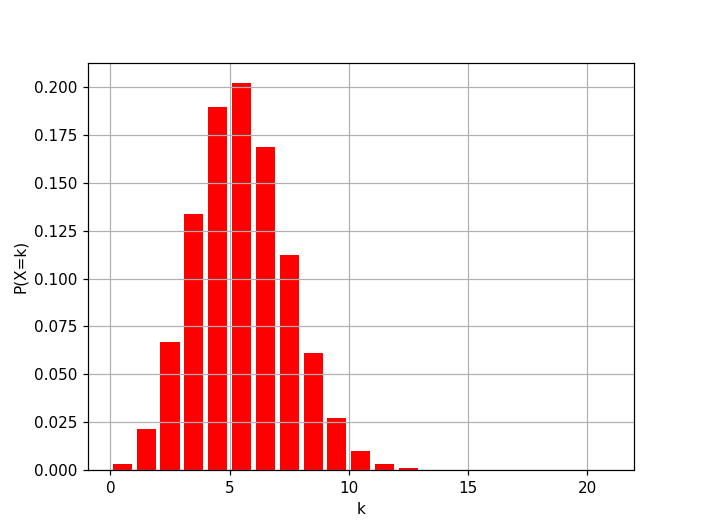

0.013296955574625721


In [9]:
from numpy import log

def binomial_log(n, p):
    P = np.ones(n+1)
    P[0] = n*log(1-p) #  = (1-p)^n ;  "Vor-Logarithmisierung für Folgerechnung"
    for k in range(n):
    #     P[k+1]  =     P[k] *     (p/(1-p)) *    ((n-k)/(k+1))   | log()
    # log(P[k+1]) = log(P[k]  *    (p/(1-p)) *    ((n-k)/(k+1)))  | log(ab) = log(a) + log(b) anwenden
    # log(P[k+1]) = log(P[k]) + log(p/(1-p)) + log((n-k)/(k+1))   | log(P[k]) ist durch P[k-1] bereits "logarithmisiert"
          P[k+1]  =     P[k]  + log(p/(1-p)) + log((n-k)/(k+1))
    return np.e**P


# # Einfacher Test
barplot(binomial_log(20, 0.25))

# Klappt :-) ?
P = binomial_log(10000, 0.1)
print(P[1000])